In [2]:
import numpy as np
from numpy import exp
import matplotlib.pyplot as plt
from matplotlib import cm


# The Marshall-Olkin Bivariate Exponential Distribution

The **univariate exponential distribution** plays a central role in mathematical statistics because it is the distribution of **waiting time in a standard Poisson process**. 

The following **bivariate exponential** distribution,
first described by **Marshall** and **Olkin**, plays a similar role in a
two-dimensional Poisson process.


## How to get Probabilities

### Purpose

Let X and Y denote
the lifetimes of the **components 1 and 2**, respectively.

As is often the
case in dealing with **lifetimes**, we will find the survival function 

$
\overline{H}(x,y) = \mathbf{P}(X>x,\;Y>y),
$

 the probability that component 1 **survives** beyond
time x and that component 2 survives beyond time y.

---

### Shocks

The “shocks” to the two components are assumed to form three independent Poisson processes with (positive) parameters 
$\lambda_{1},\;\lambda_{2},\;\lambda_{12},\;$
depending on whether the shock kills only component 1, only component 2, or both components simultaneously.

---

### Probabilities

The times $Z_1,\;Z_2,\;Z_{12}$ of occurrence of these three shocks are **independent exponential random variables** with parameters $\lambda_{1},\;\lambda_{2},\;\lambda_{12},\;$ respectively. ($Z_k \sim \mathbb{E}_k$)

$X = \min{(Z_1,Z_{12})},\;\;\; Y = \min{(Z_2,Z_{12})}$

$\overline{H}(x,y) = \exp{(-\lambda_1x - \lambda_2y - \lambda_{12}\max{(x,y)})}$

$\overline{F}(x) =   \exp{(-\lambda_1x- \lambda_{12}x)}$

$\overline{G}(y) =   \exp{(-\lambda_2y- \lambda_{12}y)}$

---


In [29]:
L1,L2,L12 = 1,1,1


X = Y = np.linspace(0,2,10)
X,Y = np.meshgrid(X,Y)
X = X.ravel()
Y = Y.ravel()

H = np.vectorize(lambda x,y : exp(-L1*x - L2*y - L12*max(x,y)))
F = np.vectorize(lambda x : exp(-L1*x -L12*x))
G = np.vectorize(lambda y : exp(-L2*y - L12*y))



Z = H(X,Y).ravel()

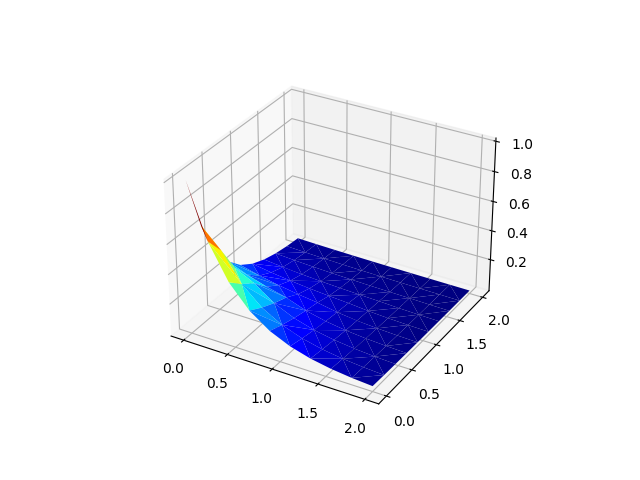

In [30]:
%matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.plot_trisurf(X,Y,Z, cmap = cm.jet)
plt.show()

## How to get Copula (Survival)

**replace** $\max(x,y)$ by $x + y – \min(x,y)$ , so that

$\hat{C}(u,v)  = \overline{H}\left(\overline{F}^{(-1)}(u),\overline{G}^{(-1)}(v)\right)$

$\alpha = \frac{\lambda_{12}}{\lambda_{1}+\lambda_{12}},\;\;\; \beta = \frac{\lambda_{12}}{\lambda_{2}+\lambda_{12}}
,\;\;\; 0 \leq \alpha,\;\beta \leq 1$


$C_{\alpha \beta} = \hat{C}(u,v) = uv\min{(u^{-\alpha},\;v^{-\beta})}$

---


In [31]:
def Create_Copula_Marshall_Olkin(alpha, beta):
    @np.vectorize
    def Copula_Marshall_Olkin(u,v):
        return u*v*min(pow(u,-alpha),pow(v,-beta))
    return Copula_Marshall_Olkin

@np.vectorize
def P(x,y):
  return x*y

@np.vectorize
def M(x,y):
  return min(x,y)

In [32]:
alpha = L12/(L1+L12)
beta = L12/(L2+L12)



U = V = np.linspace(0,1,10)+0.0001
U,V = np.meshgrid(U,V)
U = U.ravel()
V = V.ravel()

CMO = Create_Copula_Marshall_Olkin(alpha,beta)

C = CMO(U,V).ravel()
C1 = CMO(F(X),G(Y)).ravel()

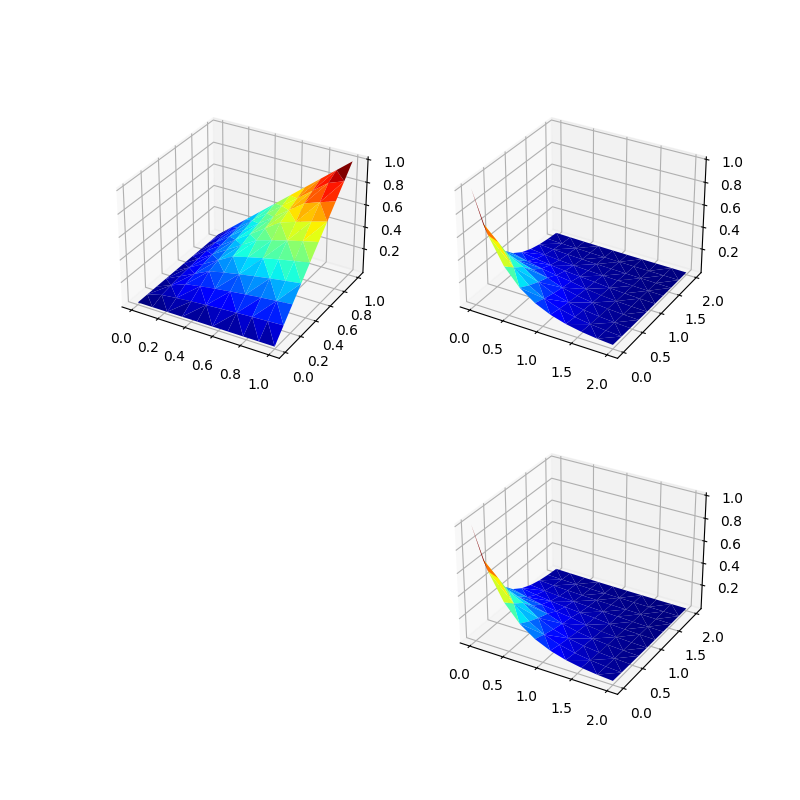

In [33]:
%matplotlib widget

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(221, projection = "3d")
ax.plot_trisurf(U,V,C, cmap = cm.jet)

ax = fig.add_subplot(222, projection = "3d")
ax.plot_trisurf(X,Y,C1, cmap = cm.jet)

ax = fig.add_subplot(224, projection = "3d")
ax.plot_trisurf(X,Y,Z, cmap = cm.jet)

plt.show()

$C_{\alpha 0} = C_{0 \beta} = \Pi$

$C_{11} = M$

---

In [34]:
alpha = 0.5
beta = 0
CMO1 = Create_Copula_Marshall_Olkin(alpha,beta)
####################################################
alpha = 0.0
beta = 0.5
CMO2 = Create_Copula_Marshall_Olkin(alpha,beta)
#####################################################
alpha = 1
beta = 1
CMO3 = Create_Copula_Marshall_Olkin(alpha,beta)


C1 = CMO1(U,V).ravel()
C2 = CMO2(U,V).ravel()
C3 = CMO3(U,V).ravel()

C:\Users\TimofeyT\AppData\Local\Temp\ipykernel_15304\3225136648.py:9: UserWarning: The following kwargs were not used by contour: 'zdir'
  ax1.tricontourf(U,V,C1, zdir='z',cmap=cm.jet)
C:\Users\TimofeyT\AppData\Local\Temp\ipykernel_15304\3225136648.py:12: UserWarning: The following kwargs were not used by contour: 'zdir'
  ax2.tricontourf(U,V,P(U,V), zdir='z',cmap=cm.jet)
C:\Users\TimofeyT\AppData\Local\Temp\ipykernel_15304\3225136648.py:18: UserWarning: The following kwargs were not used by contour: 'zdir'
  ax1.tricontourf(U,V,C2, zdir='z',cmap=cm.jet)
C:\Users\TimofeyT\AppData\Local\Temp\ipykernel_15304\3225136648.py:24: UserWarning: The following kwargs were not used by contour: 'zdir'
  ax1.tricontourf(U,V,C3, zdir='z',cmap=cm.jet)
C:\Users\TimofeyT\AppData\Local\Temp\ipykernel_15304\3225136648.py:27: UserWarning: The following kwargs were not used by contour: 'zdir'
  ax2.tricontourf(U,V,M(U,V), zdir='z',cmap=cm.jet)


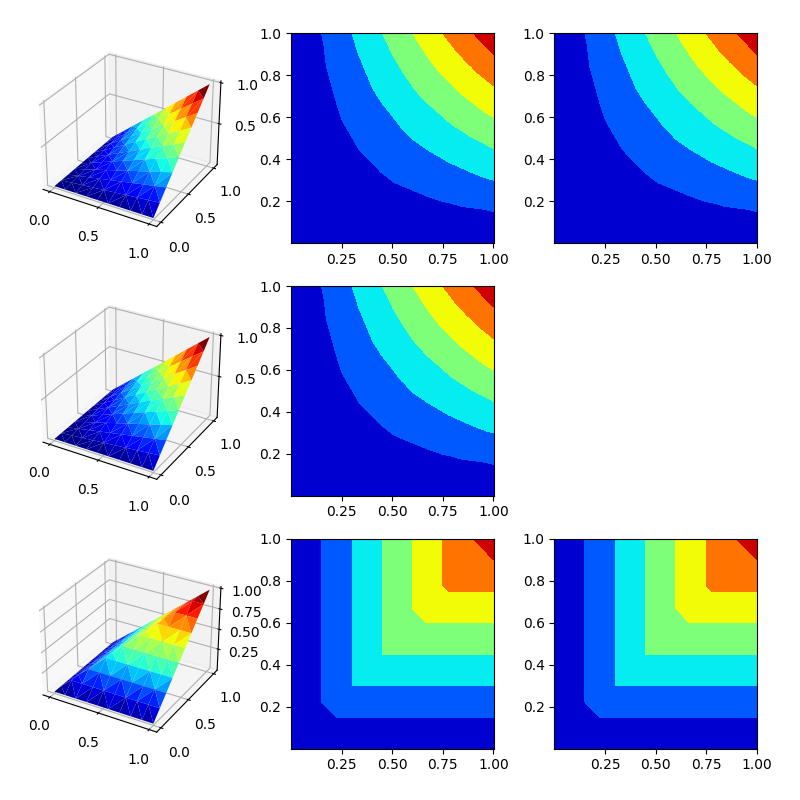

In [35]:
%matplotlib widget

fig = plt.figure(figsize=(8,8))
#####################################################
ax = fig.add_subplot(331, projection = "3d")
ax.plot_trisurf(U,V,C1, cmap = cm.jet)

ax1 = fig.add_subplot(332)
ax1.tricontourf(U,V,C1, zdir='z',cmap=cm.jet)

ax2 = fig.add_subplot(333)
ax2.tricontourf(U,V,P(U,V), zdir='z',cmap=cm.jet)
#####################################################
ax = fig.add_subplot(334, projection = "3d")
ax.plot_trisurf(U,V,C2, cmap = cm.jet)

ax1 = fig.add_subplot(335)
ax1.tricontourf(U,V,C2, zdir='z',cmap=cm.jet)
#####################################################
ax = fig.add_subplot(337, projection = "3d")
ax.plot_trisurf(U,V,C3, cmap = cm.jet)

ax1 = fig.add_subplot(338)
ax1.tricontourf(U,V,C3, zdir='z',cmap=cm.jet)

ax2 = fig.add_subplot(339)
ax2.tricontourf(U,V,M(U,V), zdir='z',cmap=cm.jet)

plt.tight_layout(pad=2, w_pad=1, h_pad=1.0)
plt.show()

! $U,V  \sim \mathbb{U}_{[0,\;1]}$ random variables whose joint distribution function is the copula
$C_{\alpha \beta}$, then  

$\mathbb{P}(U^\alpha = V^\beta) = \frac{\alpha\beta}{\alpha+\beta+\alpha\beta}$

---

In [36]:
SIZE =  5000

L1 = 1
L2 = 3
L12 = 1

alpha = L12/(L1+L12)
beta = L12/(L2+L12)
print(alpha,beta)

r = np.random.uniform(0,1,SIZE)
s = np.random.uniform(0,1,SIZE)
t = np.random.uniform(0,1,SIZE)

my_min = np.vectorize (lambda x,y: min(x,y))

x = my_min(-np.log(r)/L1, -np.log(t)/L12)
y = my_min(-np.log(s)/L2, -np.log(t)/L12)

F = np.vectorize(lambda x : exp(-L1*x - L12*x))
G = np.vectorize(lambda y : exp(-L2*y - L12*y))

X = F(x)
Y = G(y)


CMO =  Create_Copula_Marshall_Olkin(alpha,beta)
C = CMO(X,Y)

0.5 0.25


C:\Users\TimofeyT\AppData\Local\Temp\ipykernel_15304\697997274.py:12: UserWarning: The following kwargs were not used by contour: 'zdir'
  ax2.tricontourf(X,Y,C, zdir='z',cmap=cm.jet)


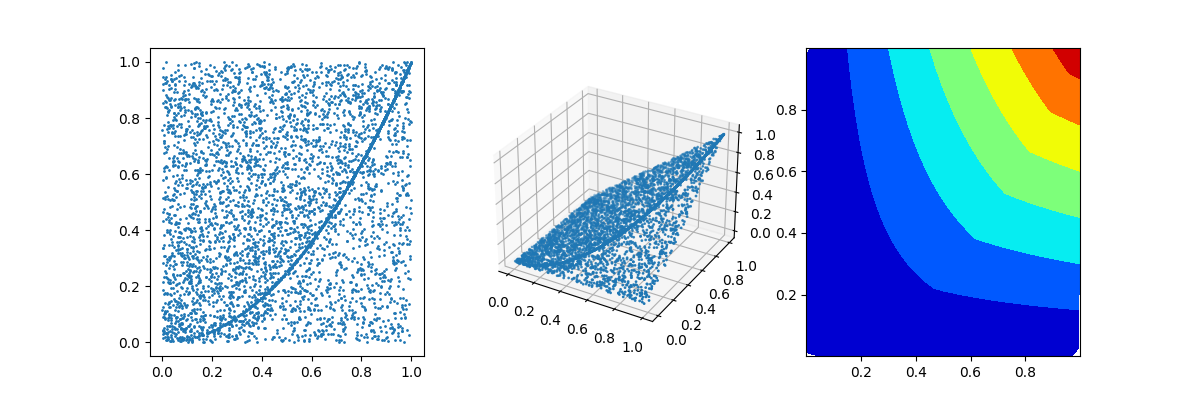

In [37]:
%matplotlib widget

fig = plt.figure(figsize=(12,4))
#####################################################
ax = fig.add_subplot(131)
ax.scatter(X,Y,s = 1)

ax = fig.add_subplot(132, projection = "3d")
ax.scatter(X,Y,C,s = 1)

ax2 = fig.add_subplot(133)
ax2.tricontourf(X,Y,C, zdir='z',cmap=cm.jet)


plt.show()

In [38]:
SIZE =  5000

L1 = 2
L2 = 3
L12 = 1

alpha = L12/(L1+L12)
beta = L12/(L2+L12)
print(alpha,beta)

r = np.random.uniform(0,1,SIZE)
s = np.random.uniform(0,1,SIZE)
t = np.random.uniform(0,1,SIZE)

my_min = np.vectorize (lambda x,y: min(x,y))

x = my_min(-np.log(r)/L1, -np.log(t)/L12)
y = my_min(-np.log(s)/L2, -np.log(t)/L12)

F = np.vectorize(lambda x : exp(-L1*x - L12*x))
G = np.vectorize(lambda y : exp(-L2*y - L12*y))

X = F(x)
Y = G(y)


CMO =  Create_Copula_Marshall_Olkin(alpha,beta)
C = CMO(X,Y)

0.3333333333333333 0.25


C:\Users\TimofeyT\AppData\Local\Temp\ipykernel_15304\697997274.py:12: UserWarning: The following kwargs were not used by contour: 'zdir'
  ax2.tricontourf(X,Y,C, zdir='z',cmap=cm.jet)


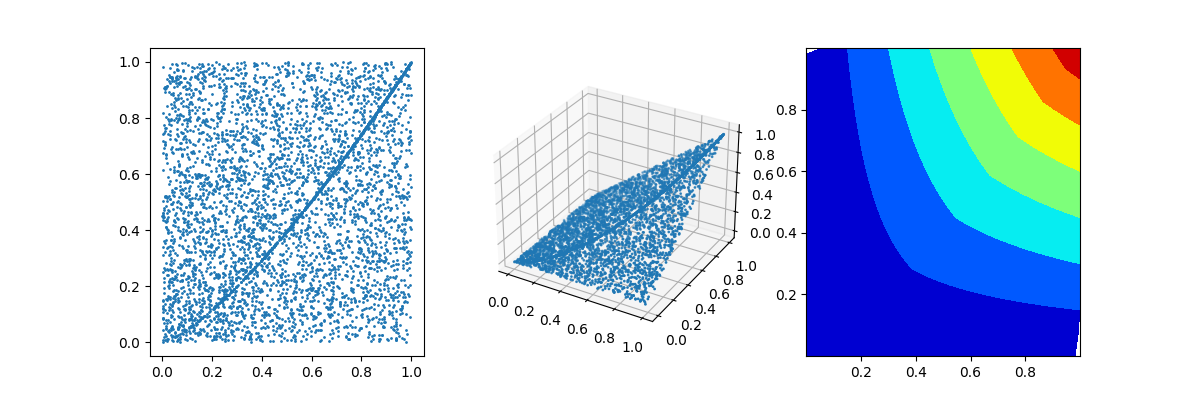

In [39]:
%matplotlib widget

fig = plt.figure(figsize=(12,4))
#####################################################
ax = fig.add_subplot(131)
ax.scatter(X,Y,s = 1)

ax = fig.add_subplot(132, projection = "3d")
ax.scatter(X,Y,C,s = 1)

ax2 = fig.add_subplot(133)
ax2.tricontourf(X,Y,C, zdir='z',cmap=cm.jet)


plt.show()

## 3.2 

Show that a version of the Marshall-Olkin bivariate distribution
with Pareto margins (see Example 2.14) 

$\overline{F}(x) = 
\begin{cases}
(1+x)^{-\theta},   & x \geq 0 \\ 
1,              & x < 0
\end{cases}
$

$\overline{G}(y) = 
\begin{cases}
(1+y)^{-\theta},   & y \geq 0 \\ 
1,              & x < 0
\end{cases}
$

has joint survival functions given by

$\overline{H}(x,y) = (1+x)^{-\theta_1}(1+y)^{-\theta_2}\left( 1 + \max(x,\; y)\right)^{-\theta_{12}}$

$x,y \geq 0,\;\;\; \theta_{1},\theta_{2},\theta_{12} > 0$

In [40]:
def CreateFG(theta):
    return np.vectorize(lambda x: pow(1+x, -theta) if x>=0 else 1)

In [46]:
X = Y = np.linspace(0,2,10)
X,Y = np.meshgrid(X,Y)
X = X.ravel()
Y = Y.ravel()

theta = 1
F = CreateFG(theta)

G = CreateFG(theta)

U = F(X)
V = G(Y)

alpha = 0.5
beta = 0.5
C = Create_Copula_Marshall_Olkin(alpha, beta)(U,V)


###################

theta1 = theta2 = theta
theta12 = max(alpha,beta)*theta

H = np.vectorize( lambda x,y:  pow(1+x,-theta1)* pow(1+y,-theta2)* pow(1+max(x,y), -theta12))
Z = H(X,Y)


C:\Users\TimofeyT\AppData\Local\Temp\ipykernel_15304\3755242115.py:8: UserWarning: The following kwargs were not used by contour: 'zdir'
  ax1.tricontourf(X,Y,C, zdir='z',cmap=cm.jet)
C:\Users\TimofeyT\AppData\Local\Temp\ipykernel_15304\3755242115.py:17: UserWarning: The following kwargs were not used by contour: 'zdir'
  ax1.tricontourf(X,Y,Z, zdir='z',cmap=cm.jet)


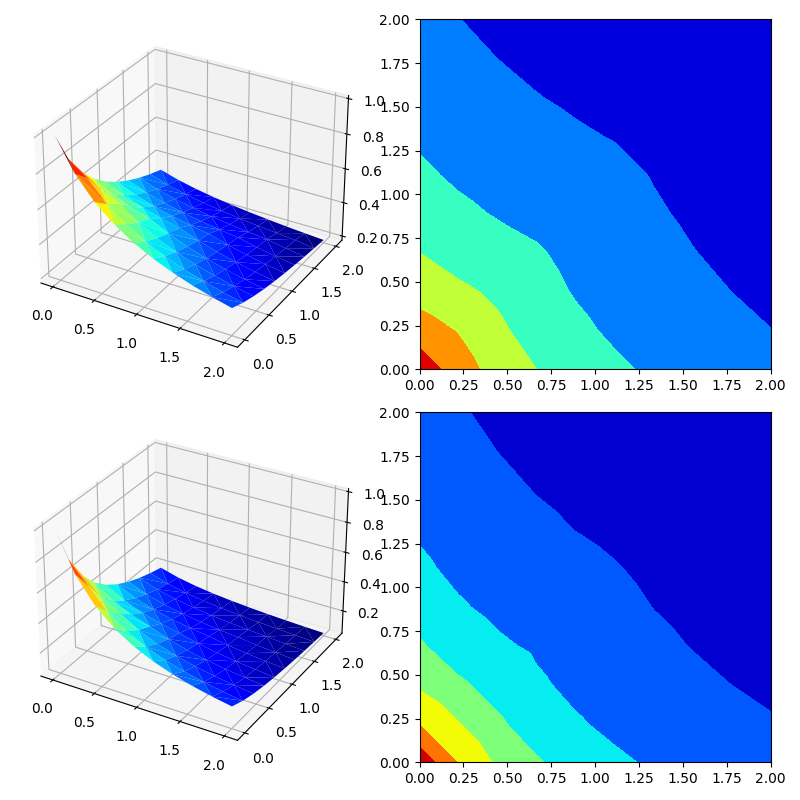

In [47]:
%matplotlib widget

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(221, projection = "3d")
ax.plot_trisurf(X,Y,C, cmap = cm.jet)

ax1 = fig.add_subplot(222)
ax1.tricontourf(X,Y,C, zdir='z',cmap=cm.jet)

plt.tight_layout(pad=1, w_pad=1, h_pad=1.0)

########################################################
ax = fig.add_subplot(223, projection = "3d")
ax.plot_trisurf(X,Y,Z, cmap = cm.jet)

ax1 = fig.add_subplot(224)
ax1.tricontourf(X,Y,Z, zdir='z',cmap=cm.jet)

plt.tight_layout(pad=1, w_pad=1, h_pad=1.0)




plt.show()

## 3.3

Prove the following generalization of the Marshall-Olkin family
(3.1.3) of copulas: Suppose that a and b are increasing functions
defined on I such that 

$a(0) = b(0) = 0$ and $a(1) = b(1) = 1.$ 

Further suppose that the functions 

$\frac{a(u)}{u}$  and $\frac{b(v)}{v}$ 

are both decreasing on $(0,1]$. 

In [48]:
U  = V = np.linspace(0,1,10)
U,V = np.meshgrid(U,V)
U = U.ravel()
V = V.ravel()


$a(x) = x^2,\;\;\; b(x) = x$

C:\Users\TimofeyT\AppData\Local\Temp\ipykernel_15304\657963584.py:18: UserWarning: The following kwargs were not used by contour: 'zdir'
  ax1.tricontourf(U,V,C, zdir='z',cmap=cm.jet)


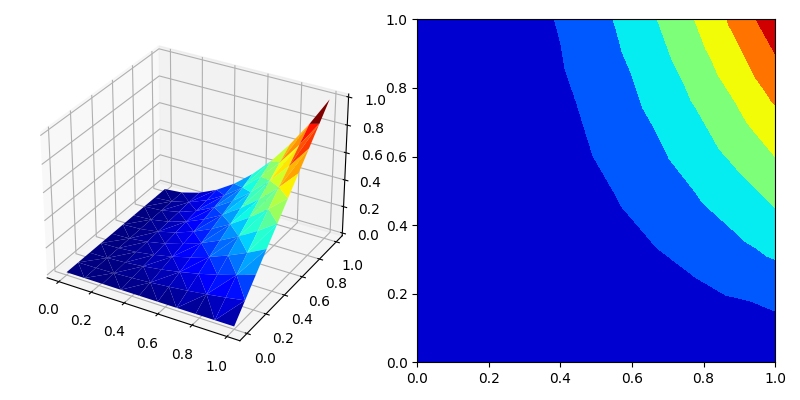

In [49]:
alpha = 0
beta  = 0


a = np.vectorize(lambda u: u*u)
b = np.vectorize(lambda v: v)
CMO = np.vectorize(lambda u,v: min(v*a(u), u*b(v)))

C = CMO(U,V)

%matplotlib widget

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(121, projection = "3d")
ax.plot_trisurf(U,V,C, cmap = cm.jet)

ax1 = fig.add_subplot(122)
ax1.tricontourf(U,V,C, zdir='z',cmap=cm.jet)

plt.tight_layout(pad=1, w_pad=1, h_pad=1.0)


plt.show()

$a(x) = x^{1-\alpha},\;\;\; b(x) = x^{1-\beta}$

C:\Users\TimofeyT\AppData\Local\Temp\ipykernel_15304\3927538440.py:18: UserWarning: The following kwargs were not used by contour: 'zdir'
  ax1.tricontourf(U,V,C, zdir='z',cmap=cm.jet)


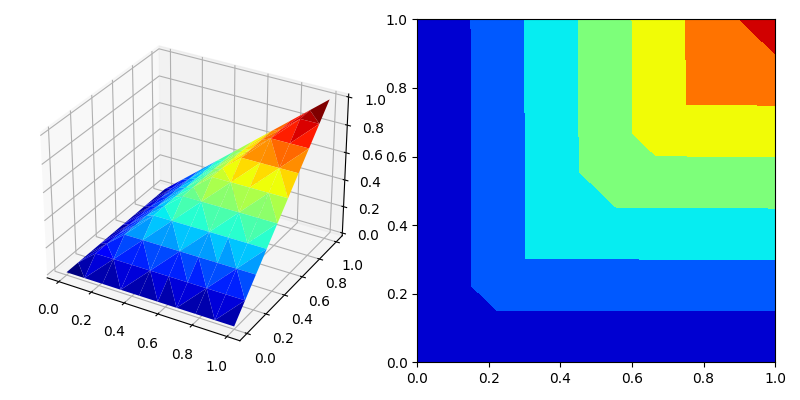

In [53]:
alpha = 0.99
beta  = 0.99


a = np.vectorize(lambda u: pow(u,1-alpha))
b = np.vectorize(lambda v: pow(v,1-beta))
CMO = np.vectorize(lambda u,v: min(v*a(u), u*b(v)))

C = CMO(U,V)

%matplotlib widget

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(121, projection = "3d")
ax.plot_trisurf(U,V,C, cmap = cm.jet)

ax1 = fig.add_subplot(122)
ax1.tricontourf(U,V,C, zdir='z',cmap=cm.jet)

plt.tight_layout(pad=1, w_pad=1, h_pad=1.0)


plt.show()

$a(x) = b(x)$

C:\Users\TimofeyT\AppData\Local\Temp\ipykernel_15304\2269779775.py:13: UserWarning: The following kwargs were not used by contour: 'zdir'
  ax1.tricontourf(U,V,C, zdir='z',cmap=cm.jet)


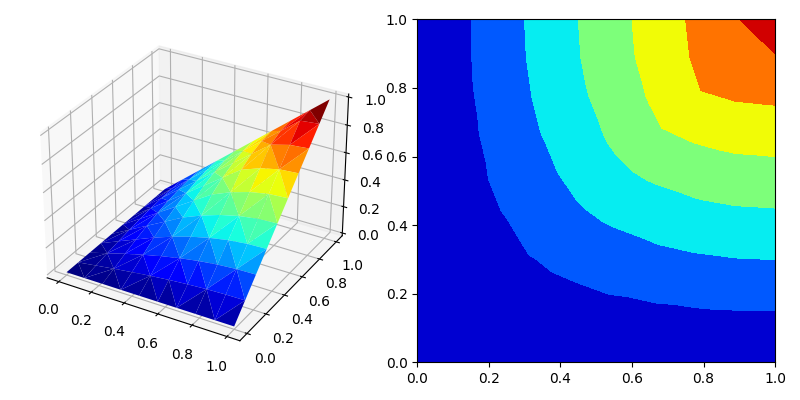

In [20]:
a = np.vectorize(lambda u: np.sin(0.5*u*np.pi))
CMO = np.vectorize(lambda u,v: min(v*a(u), u*a(v)))

C = CMO(U,V)

%matplotlib widget

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(121, projection = "3d")
ax.plot_trisurf(U,V,C, cmap = cm.jet)

ax1 = fig.add_subplot(122)
ax1.tricontourf(U,V,C, zdir='z',cmap=cm.jet)

plt.tight_layout(pad=1, w_pad=1, h_pad=1.0)


plt.show()

## 3.6

Raftery’s bivariate exponential distribution. Raftery (1984, 1985)
described the following bivariate distribution. 

Let $Z_1,Z_2,Z_{12}$, be three mutually independent exponential random variables with
parameter $\lambda > 0$, and 

let $j \sim \mathbb{B}_\theta$ be a Bernoulli random variable, independent of the Z’s, with parameter $\theta$ in (0,1). 

Set

$X = (1-\theta)Z_1 + JZ_{12}$

$Y = (1-\theta)Z_2 + JZ_{12}$

In [54]:
import scipy.stats as sps
def Chi2(n,bins,p):
    """
    n - эмпирическая плотность
    bins - координааты столбцов гистограммы
    p - функция распределения
    """
    pr = p(bins[1:])
    pl = p(bins[:-1])
    p = pr - pl

    s = 0
    for i in range(len(n)):
        s += pow(n[i] - p[i], 2)/ p[i] if p[i] else 0
    s *= len(n)

    return s,n,p

In [55]:
L = 3
theta = 0.01
SIZE = 1000

Z1 = sps.expon(L).rvs(SIZE)
Z2 =  sps.expon(L).rvs(SIZE)
Z12 = sps.expon(L).rvs(SIZE)
J = np.random.binomial(1,theta,SIZE)

X = (1-theta)*Z1 + J*Z12
Y = (1-theta)*Z2 + J*Z12


f = np.vectorize( lambda x,y:  exp(-L*max(x,y)) + (1-theta)/(1+theta)*exp( -L/(1-theta)*(x+y))*(1 - exp(L*(1+theta)/(1-theta)*min(x,y)))      )

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


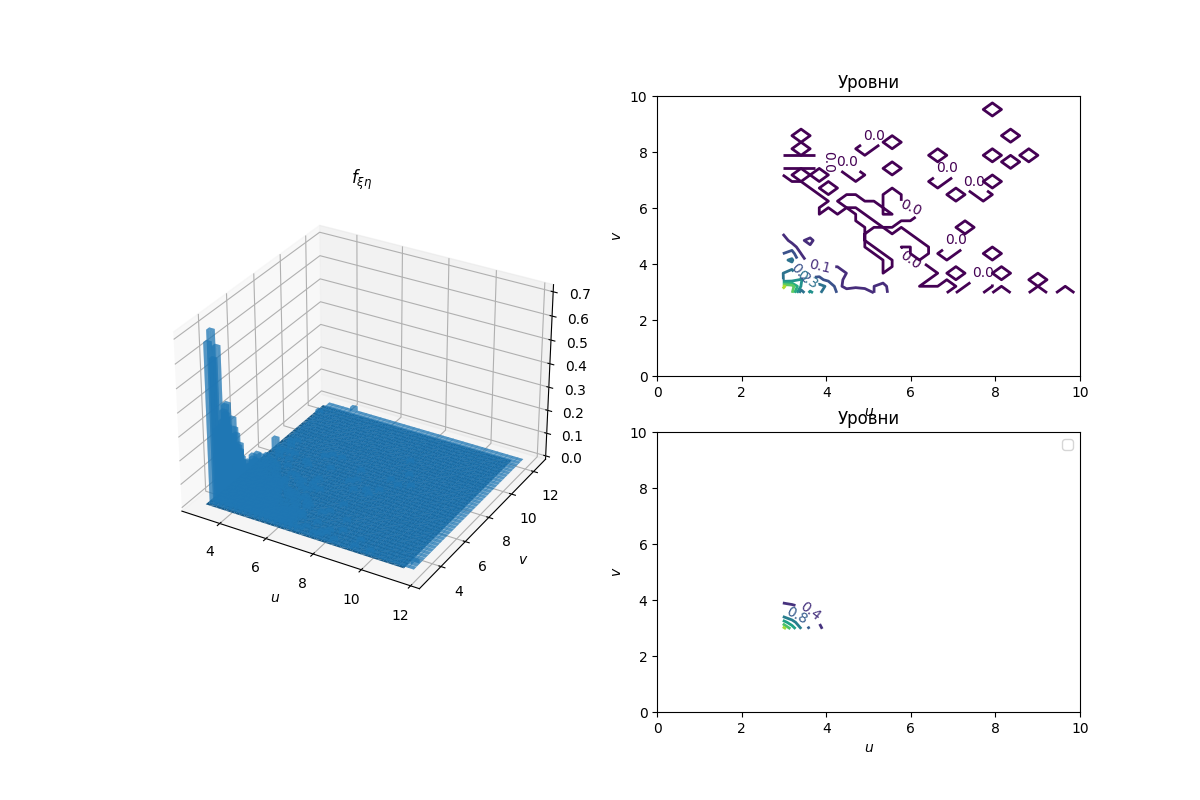

In [56]:
H, xed, yed = np.histogram2d(X, Y, (40,40),density=True)
bar_w = (-xed[0]+xed[1]) / 2
bar_l = (-yed[0]+yed[1]) / 2

S = bar_w*bar_l

XLIM = (0,10)
YLIM = XLIM

# В numpy надо всегда читать документацию (так например Histogram does not follow Cartesian convention )
H = H.T


fig = plt.figure(figsize=(12, 8))
plt.tight_layout(pad=1, w_pad=5, h_pad=1.0)

ax = fig.add_subplot(121,projection='3d')
ax.set_title(r"$f_{\xi\eta}$")
ax.set_xlabel(r"$u$")
ax.set_ylabel(r"$v$")

x = xed[:-1] 
y = yed[:-1]
x,y = np.meshgrid(x,y)

ax.bar3d(x.ravel() + bar_w, y.ravel() + bar_l,   0, 2* bar_l, 2* bar_w, H.ravel(),  shade = False, alpha = 0.5)

ax.plot_trisurf(x.ravel(), y.ravel(), f(x,y).ravel())



ax = fig.add_subplot(222)
ax.set_xlim(*XLIM)
ax.set_ylim(*YLIM)
ax.set_title(r"Уровни")
ax.set_xlabel(r"$u$")
ax.set_ylabel(r"$v$")
CS = ax.contour(x, y, H, linewidths = 2)
ax.clabel(CS,CS.levels)


ax = fig.add_subplot(224)
ax.set_xlim(*XLIM)
ax.set_ylim(*YLIM)
ax.set_title(r"Уровни")
ax.set_xlabel(r"$u$")
ax.set_ylabel(r"$v$")
CS = ax.contour(x,y,f(x,y), linewidths = 2)
ax.clabel(CS,CS.levels)

ax.legend()


plt.show()


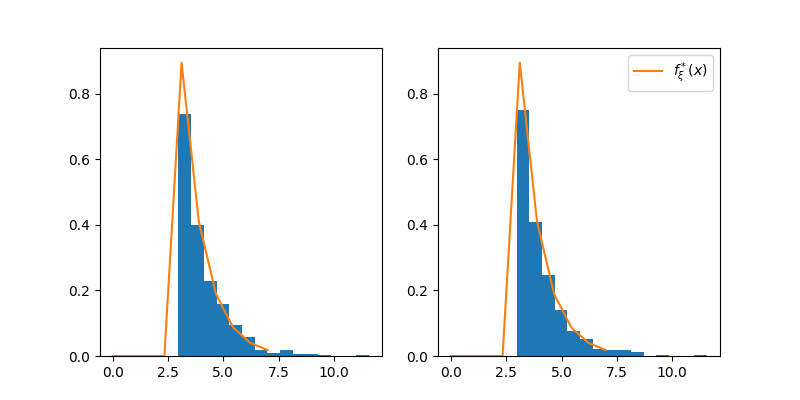

In [58]:
bins = int(5*np.log10(SIZE)) # красивая гистограма
r = bins - 1 

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(121)

x = np.linspace(0,7,10)

ni,bins,patches = ax.hist(X,bins, density=True)

ax.plot(x,sps.expon(L).pdf(x), label= r"$f_\xi^*(x)$")
#########################################
ax = fig.add_subplot(122)


ni,bins,patches = ax.hist(Y,bins, density=True)

ax.plot(x,sps.expon(L).pdf(x), label= r"$f_\xi^*(x)$")


ax.legend()
plt.show()


In [59]:
Chi_d = sps.chi2(r)
ni *= bins[1] - bins[0] # ТК в гистограме мы дели еще и на длинну интервала


chi_stat,ni,p = Chi2(ni,bins,sps.expon(L).cdf)
print(chi_stat, Chi_d.cdf(chi_stat) )

0.4119712245308349 2.607742415535631e-09


In [62]:
def Create_Copula_1(theta):
    @np.vectorize
    def M(x,y):
        return min(x,y)
    return np.vectorize(lambda u,v : M(u,v) + (1-theta)/(1+theta) * pow(u*v,1/(1-theta)) * (1 - pow(max(u,v),-(1+theta)/(1-theta))))

COP = Create_Copula_1(theta)
COP0 =  Create_Copula_1(0)
COP1 =  Create_Copula_1(0.8)

U  = V = np.linspace(0,1,10)+0.01
U,V = np.meshgrid(U,V)
U = U.ravel()
V = V.ravel()

C = COP(U,V)
C0 = COP0(U,V)
C1 = COP1(U,V)

P0 = P(U,V)
M1 = M(U,V)

C:\Users\TimofeyT\AppData\Local\Temp\ipykernel_15304\236220985.py:8: UserWarning: The following kwargs were not used by contour: 'zdir'
  ax1.tricontourf(U,V,C, zdir='z',cmap=cm.jet)
C:\Users\TimofeyT\AppData\Local\Temp\ipykernel_15304\236220985.py:14: UserWarning: The following kwargs were not used by contour: 'zdir'
  ax1.tricontourf(U,V,C0, zdir='z',cmap=cm.jet)
C:\Users\TimofeyT\AppData\Local\Temp\ipykernel_15304\236220985.py:17: UserWarning: The following kwargs were not used by contour: 'zdir'
  ax1.tricontourf(U,V,P0, zdir='z',cmap=cm.jet)
C:\Users\TimofeyT\AppData\Local\Temp\ipykernel_15304\236220985.py:23: UserWarning: The following kwargs were not used by contour: 'zdir'
  ax1.tricontourf(U,V,C1, zdir='z',cmap=cm.jet)
C:\Users\TimofeyT\AppData\Local\Temp\ipykernel_15304\236220985.py:26: UserWarning: The following kwargs were not used by contour: 'zdir'
  ax1.tricontourf(U,V,M1, zdir='z',cmap=cm.jet)
C:\Users\TimofeyT\AppData\Local\Temp\ipykernel_15304\236220985.py:31: UserWar

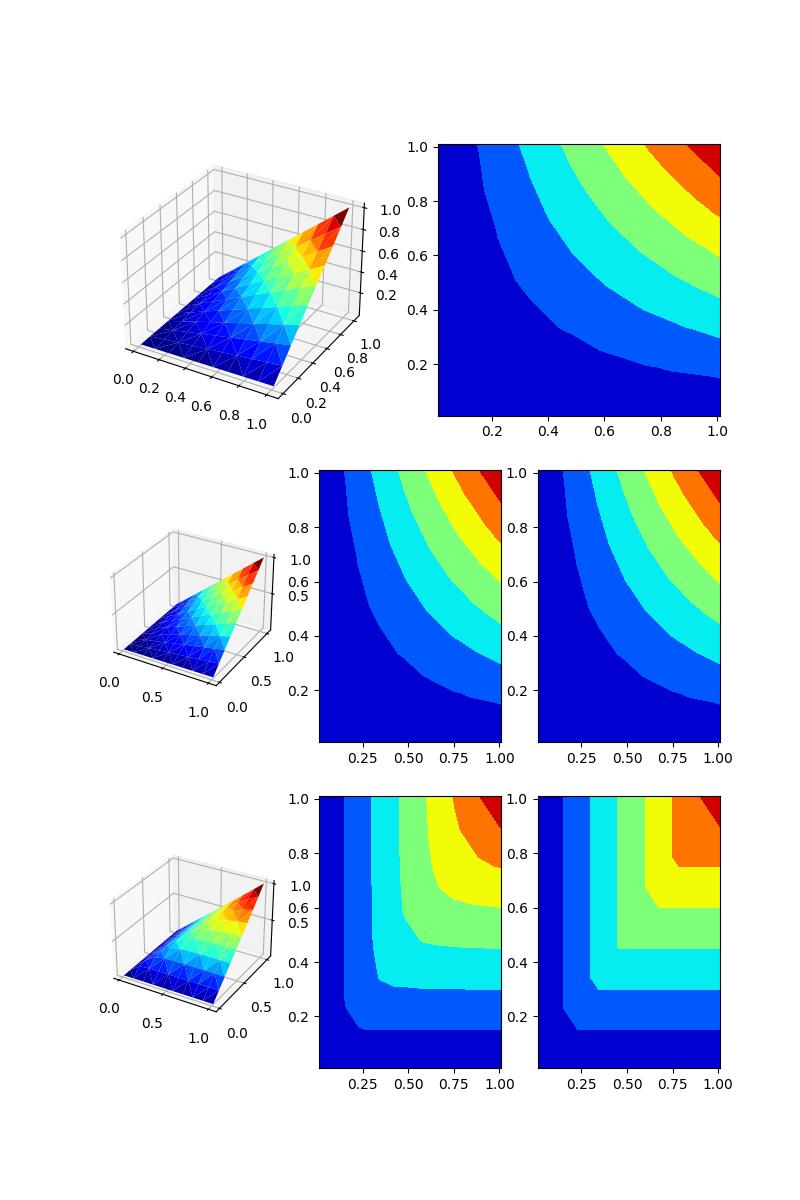

In [63]:
%matplotlib widget

fig = plt.figure(figsize=(8,12))
ax = fig.add_subplot(321, projection = "3d")
ax.plot_trisurf(U,V,C, cmap = cm.jet)

ax1 = fig.add_subplot(322)
ax1.tricontourf(U,V,C, zdir='z',cmap=cm.jet)
#####################################################
ax = fig.add_subplot(334, projection = "3d")
ax.plot_trisurf(U,V,C0, cmap = cm.jet)

ax1 = fig.add_subplot(335)
ax1.tricontourf(U,V,C0, zdir='z',cmap=cm.jet)

ax1 = fig.add_subplot(336)
ax1.tricontourf(U,V,P0, zdir='z',cmap=cm.jet)
#####################################################
ax = fig.add_subplot(337, projection = "3d")
ax.plot_trisurf(U,V,C1, cmap = cm.jet)

ax1 = fig.add_subplot(338)
ax1.tricontourf(U,V,C1, zdir='z',cmap=cm.jet)

ax1 = fig.add_subplot(339)
ax1.tricontourf(U,V,M1, zdir='z',cmap=cm.jet)




plt.tight_layout(pad=1, w_pad=1, h_pad=1.0)


plt.show()

C:\Users\TimofeyT\AppData\Local\Temp\ipykernel_15304\1373672138.py:14: UserWarning: The following kwargs were not used by contour: 'zdir'
  ax1.tricontourf(X,Y,C, zdir='z',cmap=cm.jet)
C:\Users\TimofeyT\AppData\Local\Temp\ipykernel_15304\1373672138.py:21: UserWarning: The following kwargs were not used by contour: 'zdir'
  ax1.tricontourf(X,Y,f(X,Y), zdir='z',cmap=cm.jet)


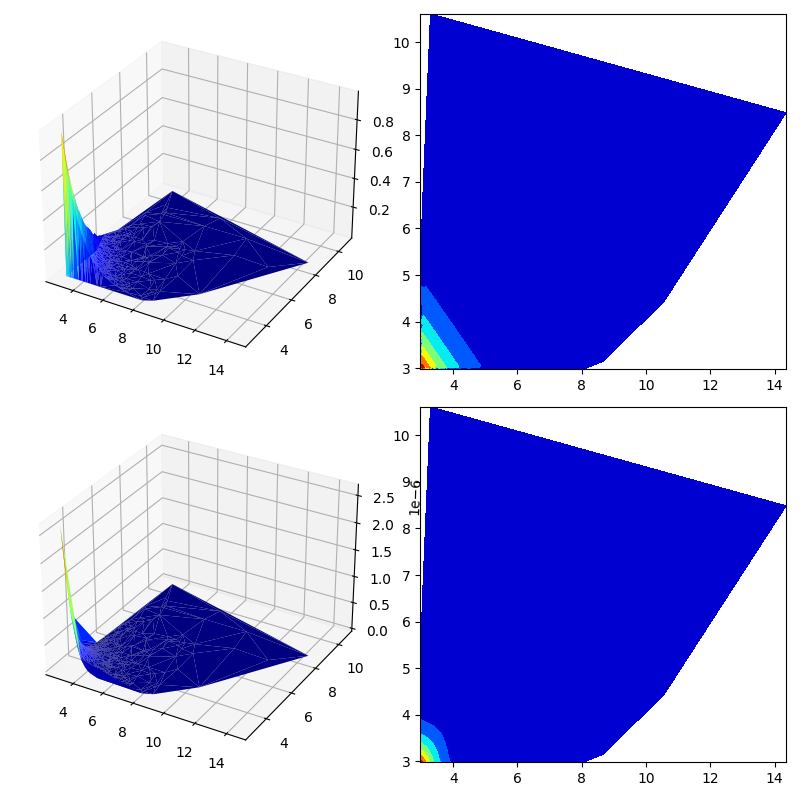

In [28]:
U = sps.expon(L).pdf(X)+0.0001
V = sps.expon(L).pdf(Y)+0.0001

C = COP(U,V)

%matplotlib widget

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(221, projection = "3d")
ax.plot_trisurf(X,Y,C, cmap = cm.jet)


ax1 = fig.add_subplot(222)
ax1.tricontourf(X,Y,C, zdir='z',cmap=cm.jet)
##################################################
ax = fig.add_subplot(223, projection = "3d")
ax.plot_trisurf(X,Y,f(X,Y), cmap = cm.jet)


ax1 = fig.add_subplot(224)
ax1.tricontourf(X,Y,f(X,Y), zdir='z',cmap=cm.jet)
plt.tight_layout(pad=1, w_pad=1, h_pad=1.0)

plt.show()